In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read csv
df = pd.read_csv("Hotel Reservations.csv")

In [ ]:
# To print no. of samples and attributes
print(df.shape)
# Describing dataset
print(df.describe())


(36275, 19)
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.

In [ ]:
# New dataframe
df2 = df

Figure(1000x400)


<Axes: xlabel='lead_time'>

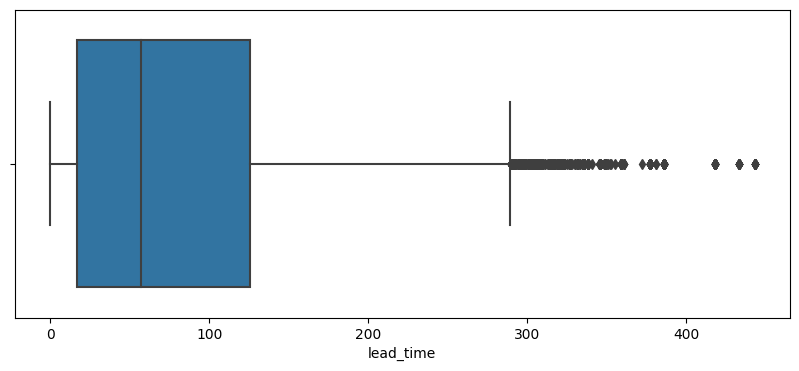

In [ ]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10,4), dpi = 100))
sns.boxplot(x = "lead_time", data = df2)

<Axes: xlabel='booking_status', ylabel='count'>

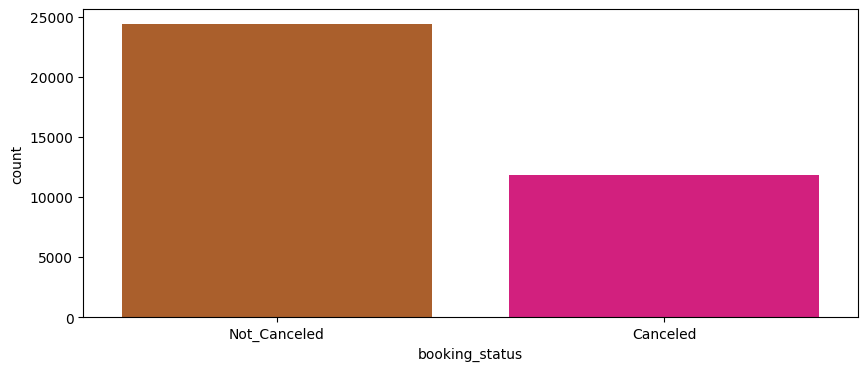

In [ ]:
#Visualizing by booking
plt.figure(figsize = (10,4), dpi = 100)
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)
sns.countplot(x = "booking_status", data = df2)


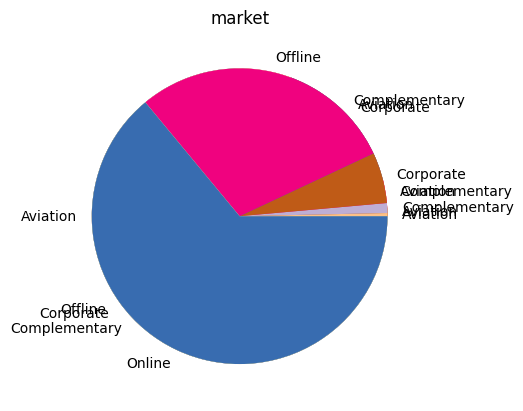

In [ ]:
#Distribution of market_segment_type(figsize = (15,9), dpi = 100)
grp = dict(df2.groupby('market_segment_type').groups)
m = {}
for key, val in grp.items():
    if key in m:
        m[key] += len(val)
    else:
        m[key] = len(val)
        plt.title("market")
        plt.pie(m.values(), labels = m.keys())


<Axes: xlabel='market_segment_type', ylabel='count'>

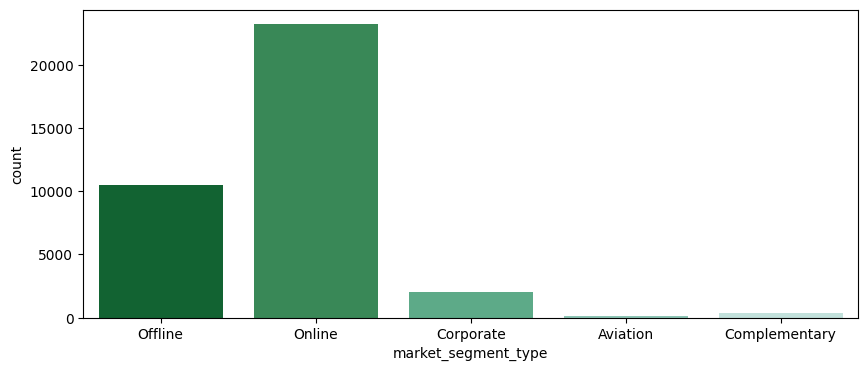

In [ ]:

df2["market_segment_type"].replace({1:"Offline", 0:"Online"}, inplace = True)
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)
sns.countplot(x = "market_segment_type", data = df2)


Figure(1000x200)


<Axes: xlabel='avg_price_per_room'>

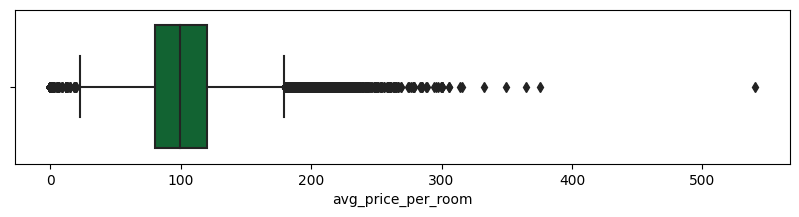

In [ ]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10,2), dpi = 100))
sns.boxplot(x = "avg_price_per_room", data = df2)

In [ ]:
# finding IQR
percentile25 = df2['avg_price_per_room'].quantile(0.25)
percentile75 = df2['avg_price_per_room'].quantile(0.75)
iqr = percentile75 - percentile25

# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# finding outliers using iqr
df2[df2['avg_price_per_room'] > upper_limit]
df2[df2['avg_price_per_room'] < lower_limit]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
165,INN00166,1,0,2,1,Meal Plan 2,0,Room_Type 1,23,2018,1,2,Online,0,0,0,1.0,0,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36164,INN36165,2,0,2,2,Meal Plan 1,0,Room_Type 1,1,2017,8,22,Online,0,0,0,12.0,0,Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled
36250,INN36251,1,0,0,2,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0,0,0.0,0,Not_Canceled


In [ ]:
# trimming outliers
new_df = df2[df2['avg_price_per_room'] < upper_limit]
new_df.shape

(35206, 19)

<ipython-input-26-2c1c6d9f998a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['avg_price_per_room'])
<ipython-input-26-2c1c6d9f998a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['avg_price_per_room'])


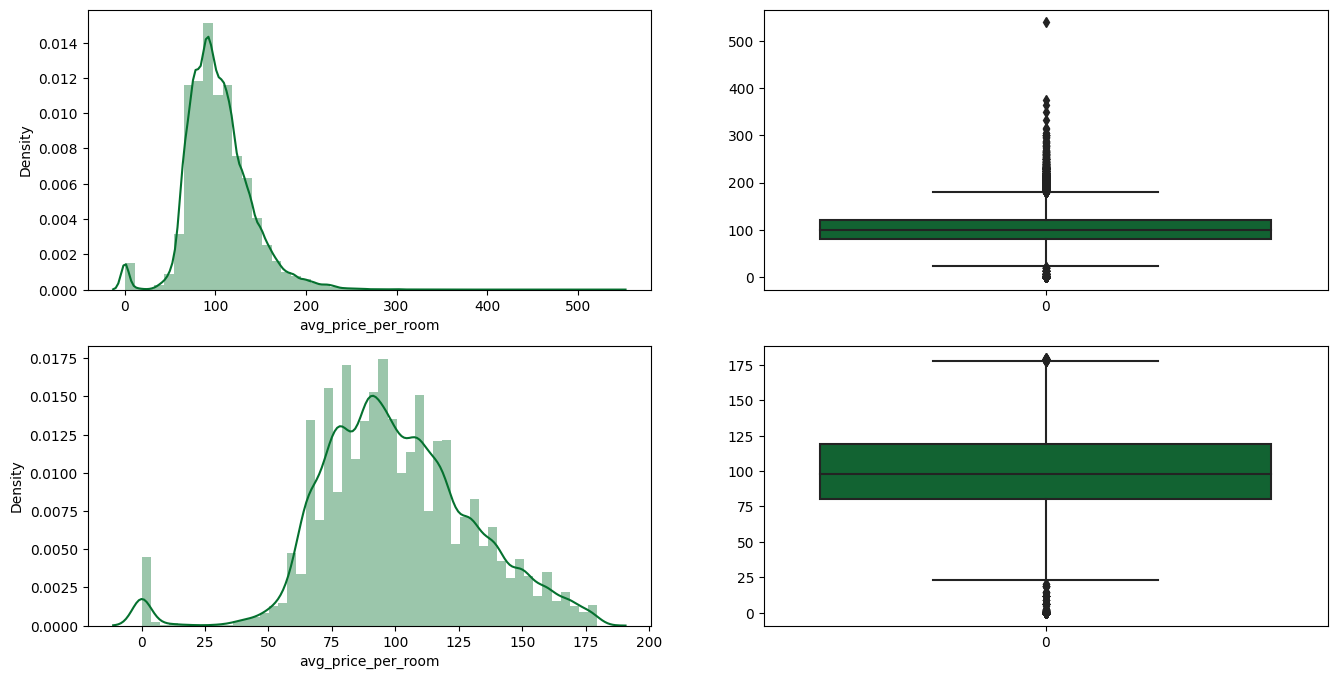

In [ ]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['avg_price_per_room'])
plt.subplot(2,2,2)
sns.boxplot(df2['avg_price_per_room'])
plt.subplot(2,2,3)
sns.distplot(new_df['avg_price_per_room'])
plt.subplot(2,2,4)
sns.boxplot(new_df['avg_price_per_room'])
plt.show()

In [ ]:
#Replacing string values with integer
new_df["booking_status"].replace({"Not_Canceled":1, "Canceled":0}, inplace = True)
new_df['Booking_ID'] = new_df['Booking_ID'].fillna(0)
print(new_df.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

<ipython-input-27-e9e9771793c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["booking_status"].replace({"Not_Canceled":1, "Canceled":0}, inplace = True)
<ipython-input-27-e9e9771793c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Booking_ID'] = new_df['Booking_ID'].fillna(0)


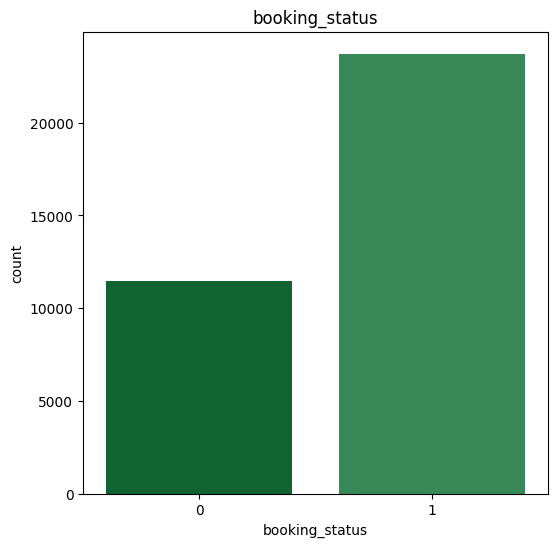

In [ ]:
new_df.booking_status.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='booking_status', data=new_df)
plt.title('booking_status')
plt.show()

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split

# split into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#KNN classifer
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)